In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
#create good styling for seaborn for research purposes
sns.set(style='whitegrid', palette='muted', font_scale=1.5)



In [2]:
# get the concatinated data
data = pd.read_csv('order_book.csv')
data.head()

,Time,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,...,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10
0,2015-03-02 09:30:00.021332726,33.29,300,33.12,4300,33.40,50,33.07,300,33.45,...,32.75,1,33.64,100,32.5,12,34.50,40,32.43,100
1,2015-03-02 09:30:00.021332726,33.29,300,33.12,4300,33.32,200,33.07,300,33.40,...,32.75,1,33.60,50,32.5,12,33.64,100,32.43,100
2,2015-03-02 09:30:00.025798844,33.29,300,33.12,4300,33.32,400,33.07,300,33.40,...,32.75,1,33.60,50,32.5,12,33.64,100,32.43,100
3,2015-03-02 09:30:00.026162808,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,...,32.75,1,33.57,100,32.5,12,33.60,50,32.43,100
4,2015-03-02 09:30:00.026249001,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,...,32.75,1,33.57,100,32.5,12,33.60,50,32.43,100


In [3]:
#lets check data 
data.columns

Index(['Time', 'Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1',
       'Ask Price 2', 'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3',
       'Ask Size 3', 'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4',
       'Bid Price 4', 'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5',
       'Bid Size 5', 'Ask Price 6', 'Ask Size 6', 'Bid Price 6', 'Bid Size 6',
       'Ask Price 7', 'Ask Size 7', 'Bid Price 7', 'Bid Size 7', 'Ask Price 8',
       'Ask Size 8', 'Bid Price 8', 'Bid Size 8', 'Ask Price 9', 'Ask Size 9',
       'Bid Price 9', 'Bid Size 9', 'Ask Price 10', 'Ask Size 10',
       'Bid Price 10', 'Bid Size 10'],
      dtype='object')

In [4]:
#we will focus on up to level 5 data for effiency 
# lets check where bid_size_5 index is 
bs5_loc = data.columns.get_loc('Bid Size 5')
#drop columns after bid_size_5
data = data.drop(data.columns[bs5_loc+1:], axis=1)
data.columns    


Index(['Time', 'Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1',
       'Ask Price 2', 'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3',
       'Ask Size 3', 'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4',
       'Bid Price 4', 'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5',
       'Bid Size 5'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078336 entries, 0 to 2078335
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Time         object 
 1   Ask Price 1  float64
 2   Ask Size 1   int64  
 3   Bid Price 1  float64
 4   Bid Size 1   int64  
 5   Ask Price 2  float64
 6   Ask Size 2   int64  
 7   Bid Price 2  float64
 8   Bid Size 2   int64  
 9   Ask Price 3  float64
 10  Ask Size 3   int64  
 11  Bid Price 3  float64
 12  Bid Size 3   int64  
 13  Ask Price 4  float64
 14  Ask Size 4   int64  
 15  Bid Price 4  float64
 16  Bid Size 4   int64  
 17  Ask Price 5  float64
 18  Ask Size 5   int64  
 19  Bid Price 5  float64
 20  Bid Size 5   int64  
dtypes: float64(10), int64(10), object(1)
memory usage: 333.0+ MB


In [6]:
#convert time type from object to datetime
data['Time'] = pd.to_datetime(data['Time'])


#set time as index
data.set_index('Time', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2078336 entries, 2015-03-02 09:30:00.021332726 to 2015-03-06 15:59:59.931346810
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Ask Price 1  float64
 1   Ask Size 1   int64  
 2   Bid Price 1  float64
 3   Bid Size 1   int64  
 4   Ask Price 2  float64
 5   Ask Size 2   int64  
 6   Bid Price 2  float64
 7   Bid Size 2   int64  
 8   Ask Price 3  float64
 9   Ask Size 3   int64  
 10  Bid Price 3  float64
 11  Bid Size 3   int64  
 12  Ask Price 4  float64
 13  Ask Size 4   int64  
 14  Bid Price 4  float64
 15  Bid Size 4   int64  
 16  Ask Price 5  float64
 17  Ask Size 5   int64  
 18  Bid Price 5  float64
 19  Bid Size 5   int64  
dtypes: float64(10), int64(10)
memory usage: 333.0 MB


In [7]:
#we aggregate duplicate timestamps
data = data.groupby(data.index).first()

In [8]:
# midprice
data['midprice'] = (data['Bid Price 1'] + data['Ask Price 1']) / 2

#spread
data['spread'] = data['Ask Price 1'] - data['Bid Price 1']

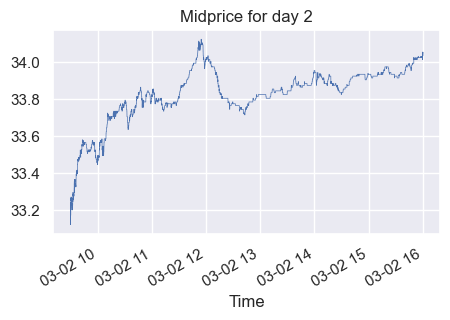

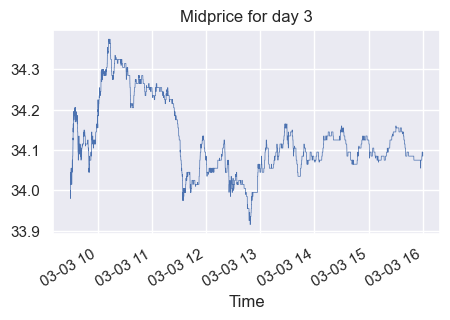

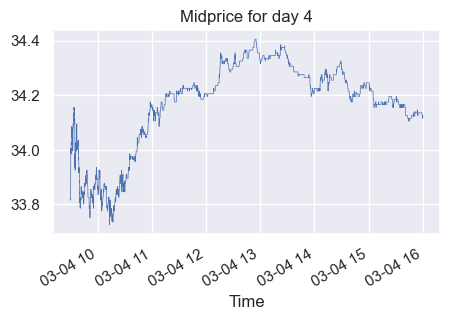

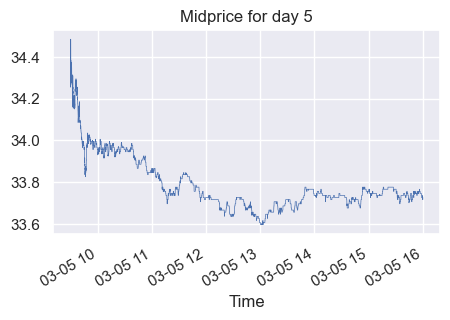

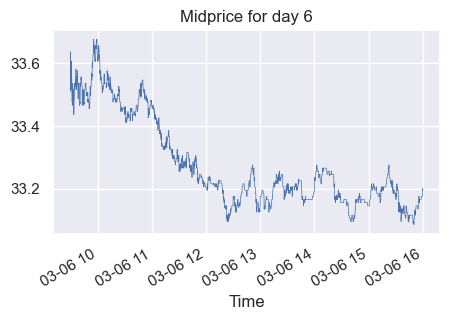

In [9]:
# 5 different plots for each day 
#lets get day from datetime index

sns.set(rc={'figure.figsize':(5, 3)})

for day in data.index.day.unique():
    data['midprice'][data.index.day == day].plot(linewidth=0.5)
    plt.title('Midprice for day {}'.format(day))
    plt.show()






this is beneficial as every day has different mvoement of midprice

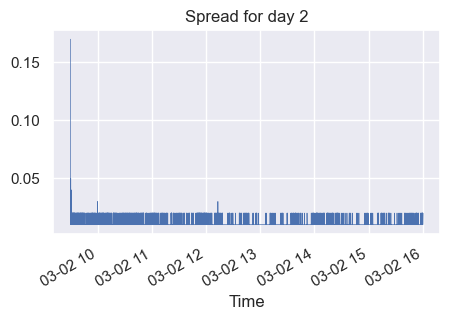

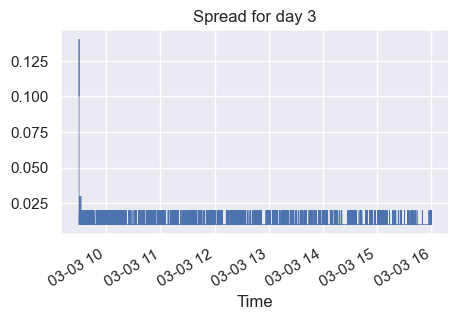

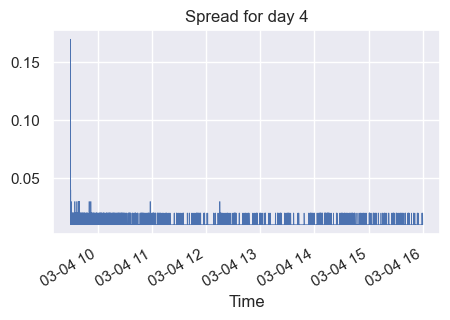

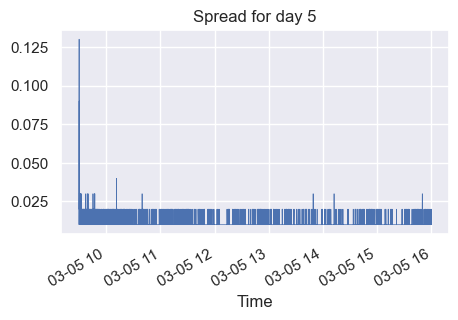

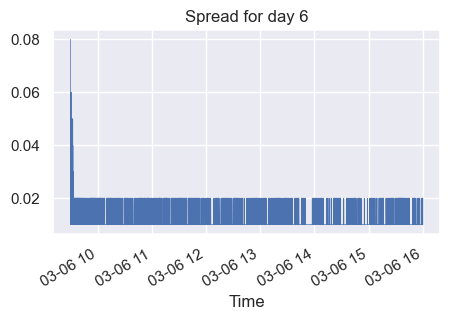

In [10]:
#spread for each day
sns.set(rc={'figure.figsize':(5, 3)})
for day in data.index.day.unique():
    data['spread'][data.index.day == day].plot(linewidth=0.5)
    plt.title('Spread for day {}'.format(day))
    plt.show()
    

In [11]:
data.head()

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,Ask Price 4,Ask Size 4,Bid Price 4,Bid Size 4,Ask Price 5,Ask Size 5,Bid Price 5,Bid Size 5,midprice,spread
Time,,,,,,,,,,,,,,,,,,,,,
2015-03-02 09:30:00.021332726,33.29,300,33.12,4300,33.40,50,33.07,300,33.45,300,...,33.47,100,32.96,7,33.50,150,32.95,200,33.205,0.17
2015-03-02 09:30:00.025798844,33.29,300,33.12,4300,33.32,400,33.07,300,33.40,50,...,33.45,300,32.96,7,33.47,100,32.95,200,33.205,0.17
2015-03-02 09:30:00.026162808,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,33.40,50,32.96,7,33.45,300,32.95,200,33.205,0.17
2015-03-02 09:30:00.026249001,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,33.40,50,32.96,7,33.45,300,32.95,200,33.205,0.17
2015-03-02 09:30:00.026313905,33.29,300,33.12,4300,33.30,200,33.07,300,33.31,200,...,33.32,400,32.96,7,33.40,50,32.95,200,33.205,0.17


In [12]:
# lets workout tick size empirically
# lets get the difference between two consecutive midprices

In [13]:
# work out tick size by looking at minimum spread
spread_min = data['spread'].min()
spread_min

0.00999999999999801

In [14]:
data['spread'] = data['spread'].round(2)

In [15]:
print(sorted(data['spread'].unique()))

#lets count the number of unique spreads
spread_counts = data['spread'].value_counts()
spread_counts


[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]


spread
0.01    1655796
0.02     210370
0.03       2426
0.04        861
0.05        449
0.06        298
0.07        167
0.08        131
0.09         56
0.11         53
0.17         28
0.10         21
0.13          7
0.12          5
0.15          3
0.16          2
0.14          1
Name: count, dtype: int64

## Feauture Engineerign

use feaetures from : https://arxiv.org/pdf/2305.15821

- Order Strength Index (OSI). To consider the dynamic
impact of newly happened events on the market, we
customize OSI to describe the relative strength between
the bid and ask. The events can be divided into three
categories: new market orders, new limit orders and order
cancellations. The strength indexes in both volumes and
numbers of each category are calculated by:
OSIv =
PVbuy −
P
P
Vsell
Vbuy +
PVsell
(2)
where V denotes the volume, and we also calculate OSI
based on the number of orders. OSI is calculated on the
time window of 10s, 60s and 300s respectively

In [16]:
# define OSI 
#OSI = V_BUY - V_SELL / (V_BUY + V_SELL) AT BEST
#use rolling window o 10s,60s,300s

data['OSI_volume_1'] = (data['Bid Size 1'] - data['Ask Size 1']) / (data['Bid Size 1'] + data['Ask Size 1'])
data['OSI_10s'] = data['OSI_volume_1'].rolling('10s', min_periods=1).mean()
data['OSI_60s'] = data['OSI_volume_1'].rolling('60s', min_periods=1).mean()
data['OSI_300s'] = data['OSI_volume_1'].rolling('300s', min_periods=1).mean()

In [17]:
data.head()

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,Ask Price 5,Ask Size 5,Bid Price 5,Bid Size 5,midprice,spread,OSI_volume_1,OSI_10s,OSI_60s,OSI_300s
Time,,,,,,,,,,,,,,,,,,,,,
2015-03-02 09:30:00.021332726,33.29,300,33.12,4300,33.40,50,33.07,300,33.45,300,...,33.50,150,32.95,200,33.205,0.17,0.869565,0.869565,0.869565,0.869565
2015-03-02 09:30:00.025798844,33.29,300,33.12,4300,33.32,400,33.07,300,33.40,50,...,33.47,100,32.95,200,33.205,0.17,0.869565,0.869565,0.869565,0.869565
2015-03-02 09:30:00.026162808,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,33.45,300,32.95,200,33.205,0.17,0.869565,0.869565,0.869565,0.869565
2015-03-02 09:30:00.026249001,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,33.45,300,32.95,200,33.205,0.17,0.869565,0.869565,0.869565,0.869565
2015-03-02 09:30:00.026313905,33.29,300,33.12,4300,33.30,200,33.07,300,33.31,200,...,33.40,50,32.95,200,33.205,0.17,0.869565,0.869565,0.869565,0.869565


In [18]:
## realised volatility

data['log_return'] = np.log(data['midprice']) - np.log(data['midprice'].shift(1))

#computer rolling realised volatility for 5min 10min 30min
data['RV_5min'] = data['log_return'].rolling('300s').std() 
data['RV_10min'] = data['log_return'].rolling('600s').std()
data['RV_30min'] = data['log_return'].rolling('1800s').std()

data[['RV_5min', 'RV_10min', 'RV_30min']] = data[['RV_5min', 'RV_10min', 'RV_30min']].fillna(0)


In [19]:
print(data[['log_return', 'RV_5min', 'RV_10min', 'RV_30min']].head(20))

                               log_return  RV_5min  RV_10min  RV_30min
Time                                                                  
2015-03-02 09:30:00.021332726         NaN      0.0       0.0       0.0
2015-03-02 09:30:00.025798844         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026162808         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026249001         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026313905         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026523391         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026606021         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.026809342         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.027072716         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.027496470         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.027666289         0.0      0.0       0.0       0.0
2015-03-02 09:30:00.027765995         0.0      0.0       0.0       0.0
2015-0

In [20]:
#check nan values
print(data['log_return'].isna().sum())
#drop nan values
data.dropna(inplace=True)
print(data['log_return'].isna().sum())

1
0


Relative Strength Index

In [21]:
def compute_rsi(data, window):
    """Computes RSI using a rolling time-based window"""
    # Calculate price difference
    delta = data['midprice'].diff()
    
    # Compute gains and losses
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    # Rolling sum for RSI calculation (time-based)
    avg_gain = pd.Series(gain, index=data.index).rolling(f'{window}min').mean()
    avg_loss = pd.Series(loss, index=data.index).rolling(f'{window}min').mean()
    
    # Compute Relative Strength (RS)
    rs = avg_gain / (avg_loss + 1e-6)  # Avoid division by zero

    # Compute RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Compute RSI for different time windows
data['RSI_5min'] = compute_rsi(data, 5)
data['RSI_10min'] = compute_rsi(data, 10)
data['RSI_30min'] = compute_rsi(data, 30)

# Fill NaNs from rolling window calculations
data[['RSI_5min', 'RSI_10min', 'RSI_30min']] = data[['RSI_5min', 'RSI_10min', 'RSI_30min']].fillna(50)

# Print sample
print(data[['midprice', 'RSI_5min', 'RSI_10min', 'RSI_30min']].head(20))


                               midprice  RSI_5min  RSI_10min  RSI_30min
Time                                                                   
2015-03-02 09:30:00.025798844    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026162808    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026249001    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026313905    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026523391    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026606021    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.026809342    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.027072716    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.027496470    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.027666289    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.027765995    33.205       0.0        0.0        0.0
2015-03-02 09:30:00.030227425    33.205       0.0        0.0    

In [22]:
data.head()

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,OSI_10s,OSI_60s,OSI_300s,log_return,RV_5min,RV_10min,RV_30min,RSI_5min,RSI_10min,RSI_30min
Time,,,,,,,,,,,,,,,,,,,,,
2015-03-02 09:30:00.025798844,33.29,300,33.12,4300,33.32,400,33.07,300,33.40,50,...,0.869565,0.869565,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-02 09:30:00.026162808,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,0.869565,0.869565,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-02 09:30:00.026249001,33.29,300,33.12,4300,33.31,200,33.07,300,33.32,400,...,0.869565,0.869565,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-02 09:30:00.026313905,33.29,300,33.12,4300,33.30,200,33.07,300,33.31,200,...,0.869565,0.869565,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-02 09:30:00.026523391,33.29,300,33.12,4300,33.30,400,33.07,300,33.31,200,...,0.869565,0.869565,0.869565,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data.columns

Index(['Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1', 'Ask Price 2',
       'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3', 'Ask Size 3',
       'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4', 'Bid Price 4',
       'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5', 'Bid Size 5',
       'midprice', 'spread', 'OSI_volume_1', 'OSI_10s', 'OSI_60s', 'OSI_300s',
       'log_return', 'RV_5min', 'RV_10min', 'RV_30min', 'RSI_5min',
       'RSI_10min', 'RSI_30min'],
      dtype='object')

we have a lot of zeroes from rolling windows lets take care of tehm

In [24]:
data.dropna(inplace=True)


In [25]:
epsilon = 1e-6
data['log_return'] = data['log_return'].replace(0, epsilon)
data['RV_5min'] = data['RV_5min'].replace(0, epsilon)
data['RV_10min'] = data['RV_10min'].replace(0, epsilon)
data['RV_30min'] = data['RV_30min'].replace(0, epsilon)


In [26]:
# apply exponetial moving average for rsi rv osi
data['RSI_5min'] = data['RSI_5min'].ewm(span=5,adjust=False).mean()
data['RSI_10min'] = data['RSI_10min'].ewm(span=10,adjust=False).mean()
data['RSI_30min'] = data['RSI_30min'].ewm(span=30,adjust=False).mean()
#rv
data['RV_5min'] = data['RV_5min'].ewm(span=5,adjust=False).mean()
data['RV_10min'] = data['RV_10min'].ewm(span=10,adjust=False).mean()
data['RV_30min'] = data['RV_30min'].ewm(span=30,adjust=False).mean()
#osi
data['OSI_10s'] = data['OSI_10s'].ewm(span=10,adjust=False).mean()
data['OSI_60s'] = data['OSI_60s'].ewm(span=60,adjust=False).mean()
data['OSI_300s'] = data['OSI_300s'].ewm(span=300,adjust=False).mean()


In [27]:
data.fillna(method='bfill', inplace=True)  # Backfill first
data.fillna(method='ffill', inplace=True)  # Forward fill any remaining NaNs


/var/folders/bc/0y423p7s3_s5t2x1hpgpzlhh0000gn/T/ipykernel_69265/3784645174.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backfill first
/var/folders/bc/0y423p7s3_s5t2x1hpgpzlhh0000gn/T/ipykernel_69265/3784645174.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill any remaining NaNs


In [28]:
print(data.isna().sum())


Ask Price 1     0
Ask Size 1      0
Bid Price 1     0
Bid Size 1      0
Ask Price 2     0
Ask Size 2      0
Bid Price 2     0
Bid Size 2      0
Ask Price 3     0
Ask Size 3      0
Bid Price 3     0
Bid Size 3      0
Ask Price 4     0
Ask Size 4      0
Bid Price 4     0
Bid Size 4      0
Ask Price 5     0
Ask Size 5      0
Bid Price 5     0
Bid Size 5      0
midprice        0
spread          0
OSI_volume_1    0
OSI_10s         0
OSI_60s         0
OSI_300s        0
log_return      0
RV_5min         0
RV_10min        0
RV_30min        0
RSI_5min        0
RSI_10min       0
RSI_30min       0
dtype: int64


Correlation Test

In [71]:
corr_matrix = data.corr()
corr_with_target = corr_matrix['midprice'].sort_values(ascending=False)
print(corr_with_target)


midprice        1.000000
Ask Price 1     0.999987
Ask Price 4     0.999981
Bid Price 4     0.999979
Ask Price 5     0.999977
Bid Price 5     0.999974
RSI_30min       0.136457
RSI_10min       0.086727
RSI_5min        0.066976
RV_10min        0.017622
RV_5min         0.013980
spread          0.012612
RV_30min        0.012417
log_return      0.000817
OSI_60s        -0.013544
OSI_10s        -0.014030
OSI_volume_1   -0.024623
OSI_300s       -0.032584
Ask Size 4     -0.114325
Bid Size 3     -0.126366
Ask Size 5     -0.128141
Bid Size 5     -0.137140
Bid Size 4     -0.148544
Name: midprice, dtype: float64


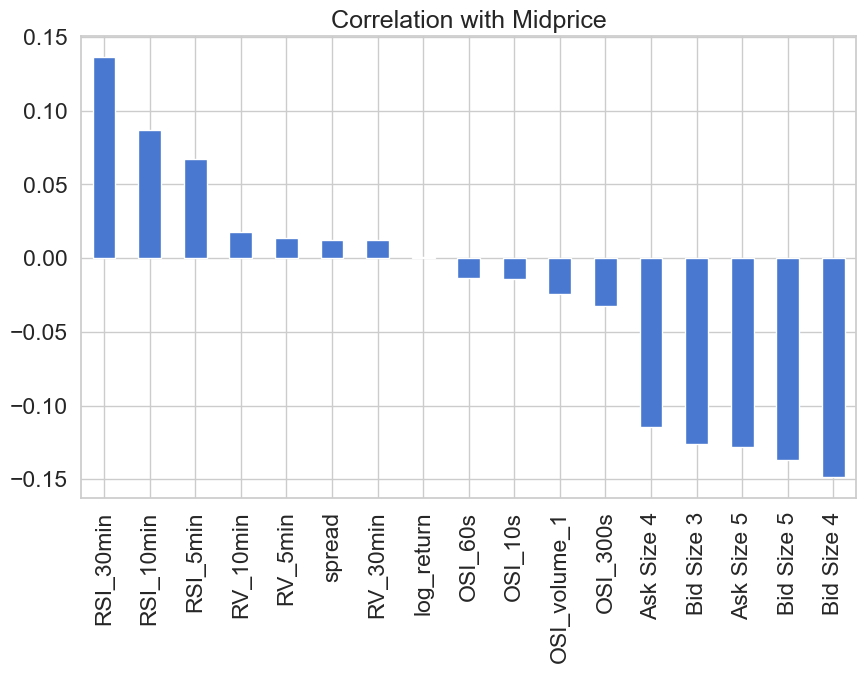

In [74]:
# Filter out the bid/ask price columns from correlation with target
price_cols = [col for col in corr_with_target.index if 'Price' in col]
corr_with_target1 = corr_with_target.drop(price_cols)
#lets plot corr_with_target and midprice
#dont icnlude midprice in the plot
corr_with_target1 = corr_with_target1.drop('midprice')
plt.figure(figsize=(10, 6))
corr_with_target1.plot(kind='bar')
plt.title('Correlation with Midprice')
plt.show()



Mutual Information to caputre nonlinear dependancies

In [53]:
from sklearn.feature_selection import mutual_info_regression

target = data['midprice']
features = data.drop(columns=['midprice'])

mi_scores = mutual_info_regression(features, target)
mi_scores = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)
print(mi_scores)


Ask Price 1     4.708755
Bid Price 1     4.708521
Ask Price 2     4.708296
Ask Price 4     4.707561
Ask Price 5     4.707179
Ask Price 3     4.706768
Bid Price 2     4.706604
Bid Price 4     4.706120
Bid Price 3     4.704809
Bid Price 5     4.704749
Ask Size 5      3.206596
Bid Size 5      3.137867
Ask Size 4      3.086581
Bid Size 4      2.862304
Ask Size 3      2.797323
Ask Size 2      2.615105
Bid Size 3      2.614534
RSI_5min        2.590223
RSI_10min       2.575899
Bid Size 2      2.385871
RSI_30min       2.263131
RV_30min        2.202140
OSI_volume_1    2.014711
Ask Size 1      1.644333
RV_10min        1.508595
Bid Size 1      1.481489
RV_5min         1.126771
OSI_300s        0.756746
spread          0.358201
OSI_60s         0.340626
OSI_10s         0.176825
log_return      0.054530
dtype: float64


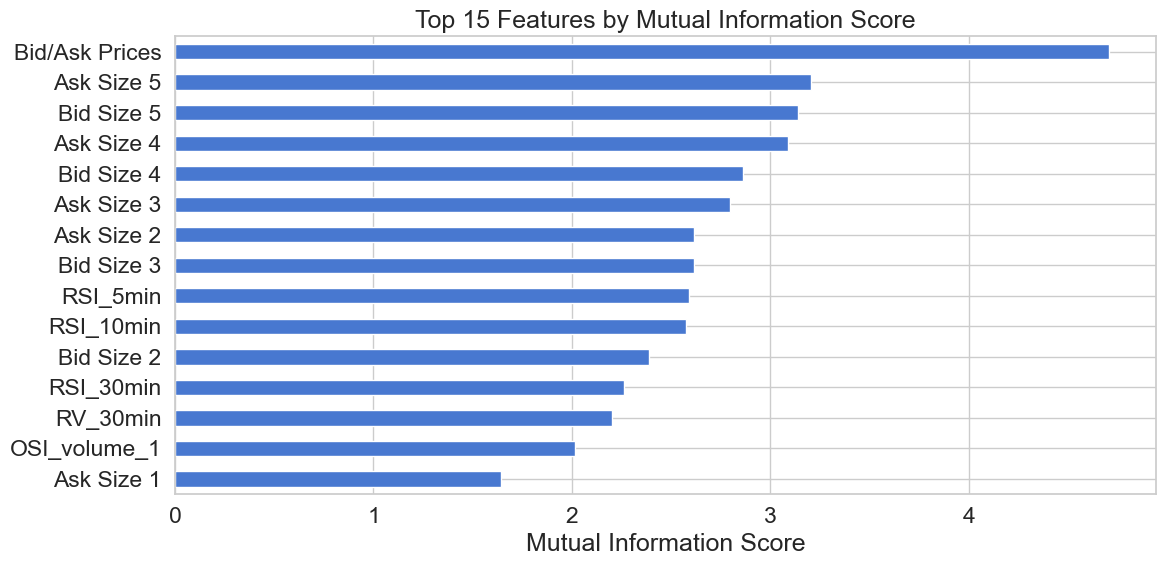

In [61]:
# Create a more readable plot of MI scores
plt.figure(figsize=(12, 6))

# Combine bid/ask prices and get mean
price_cols = [col for col in mi_scores.index if 'Price' in col]
non_price_cols = [col for col in mi_scores.index if col not in price_cols]

# Create new series with combined prices
mi_scores_plot = mi_scores[non_price_cols].copy()
mi_scores_plot['Bid/Ask Prices'] = mi_scores[price_cols].mean()

# Sort values and select top 15 features
mi_scores_plot = mi_scores_plot.sort_values(ascending=True)[-15:]

# Create horizontal bar plot
mi_scores_plot.plot(kind='barh')
plt.title('Top 15 Features by Mutual Information Score')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()


Variance threshold in case some features have low variance 

In [31]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0001)  # Adjust based on dataset
selected_features = selector.fit_transform(features)
print(f"Remaining Features: {features.columns[selector.get_support()]}")


Remaining Features: Index(['Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1', 'Ask Price 2',
       'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3', 'Ask Size 3',
       'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4', 'Bid Price 4',
       'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5', 'Bid Size 5',
       'OSI_volume_1', 'OSI_10s', 'OSI_60s', 'OSI_300s', 'RSI_5min',
       'RSI_10min', 'RSI_30min'],
      dtype='object')


In [32]:
data.columns

Index(['Ask Price 1', 'Ask Size 1', 'Bid Price 1', 'Bid Size 1', 'Ask Price 2',
       'Ask Size 2', 'Bid Price 2', 'Bid Size 2', 'Ask Price 3', 'Ask Size 3',
       'Bid Price 3', 'Bid Size 3', 'Ask Price 4', 'Ask Size 4', 'Bid Price 4',
       'Bid Size 4', 'Ask Price 5', 'Ask Size 5', 'Bid Price 5', 'Bid Size 5',
       'midprice', 'spread', 'OSI_volume_1', 'OSI_10s', 'OSI_60s', 'OSI_300s',
       'log_return', 'RV_5min', 'RV_10min', 'RV_30min', 'RSI_5min',
       'RSI_10min', 'RSI_30min'],
      dtype='object')

## Lets apply scaling
we approach it with two scaling methods
- standard: this is for non-volume 
- minmax - volum

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features for each scaling method
standard_features = ['midprice', 'spread', 'Bid Price 1', 'Ask Price 1', 
                     'Bid Price 2', 'Ask Price 2', 'Bid Price 3', 'Ask Price 3','Bid Price 4', 'Ask Price 4', 'Bid Price 5', 'Ask Price 5',
                     'log_return', 'RV_5min', 'RV_10min', 'RV_30min']
minmax_features = ['Bid Size 1', 'Ask Size 1', 'Bid Size 2', 'Ask Size 2','Bid Size 3', 'Ask Size 3', 'Bid Size 4', 'Ask Size 4', 'Bid Size 5', 'Ask Size 5',
                   'OSI_10s', 'OSI_60s', 'OSI_300s', 'RSI_5min', 'RSI_10min', 'RSI_30min']

# Apply scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# new scaled df
scaled_data = data.copy()
scaled_data[standard_features] = scaler_standard.fit_transform(data[standard_features])
scaled_data[minmax_features] = scaler_minmax.fit_transform(data[minmax_features])




In [34]:
scaled_data.head()

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,OSI_10s,OSI_60s,OSI_300s,log_return,RV_5min,RV_10min,RV_30min,RSI_5min,RSI_10min,RSI_30min
Time,,,,,,,,,,,,,,,,,,,,,
2015-03-02 09:30:00.025798844,-1.443418,0.002054,-1.887169,0.037913,-1.387589,0.003553,-1.998873,0.001398,-1.192099,0.000000,...,0.948185,0.999986,0.999997,0.000545,-0.574057,-0.59976,-0.665681,0.0,0.0,0.0
2015-03-02 09:30:00.026162808,-1.443418,0.002054,-1.887169,0.037913,-1.415518,0.001658,-1.998873,0.001398,-1.415531,0.003195,...,0.948185,0.999986,0.999997,0.000545,-0.574057,-0.59976,-0.665681,0.0,0.0,0.0
2015-03-02 09:30:00.026249001,-1.443418,0.002054,-1.887169,0.037913,-1.415518,0.001658,-1.998873,0.001398,-1.415531,0.003195,...,0.948185,0.999986,0.999997,0.000545,-0.574057,-0.59976,-0.665681,0.0,0.0,0.0
2015-03-02 09:30:00.026313905,-1.443418,0.002054,-1.887169,0.037913,-1.443448,0.001658,-1.998873,0.001398,-1.443460,0.001369,...,0.948185,0.999986,0.999997,0.000545,-0.574057,-0.59976,-0.665681,0.0,0.0,0.0
2015-03-02 09:30:00.026523391,-1.443418,0.002054,-1.887169,0.037913,-1.443448,0.003553,-1.998873,0.001398,-1.443460,0.001369,...,0.948185,0.999986,0.999997,0.000545,-0.574057,-0.59976,-0.665681,0.0,0.0,0.0


In [35]:
#save the scaled data
scaled_data.to_csv('scaled_data.csv', index=True)